### Question 1: Low-dimensional representations of galaxy photometry


In [1]:
import os
print(os.getcwd())

/Users/jennakempster-taylor/Documents/Harvard/ASTRO 205


a) Downlaod features file. Load into python

In [3]:
import pandas as pd

X_table = pd.read_pickle("./Mini Project 2/pset2-features.pkl")
y_table = pd.read_pickle("./Mini Project 2/pset2-target.pkl")

print(type(X_table))  # DataFrame

<class 'pandas.core.frame.DataFrame'>


b)i) Using PCA function from sklearn. Reduce data into 3 dimensions without normalisation.
Using source code: https://github.com/scikit-learn/scikit-learn/blob/6a0838c41/sklearn/decomposition/_pca.py#L115 

(3816, 25)


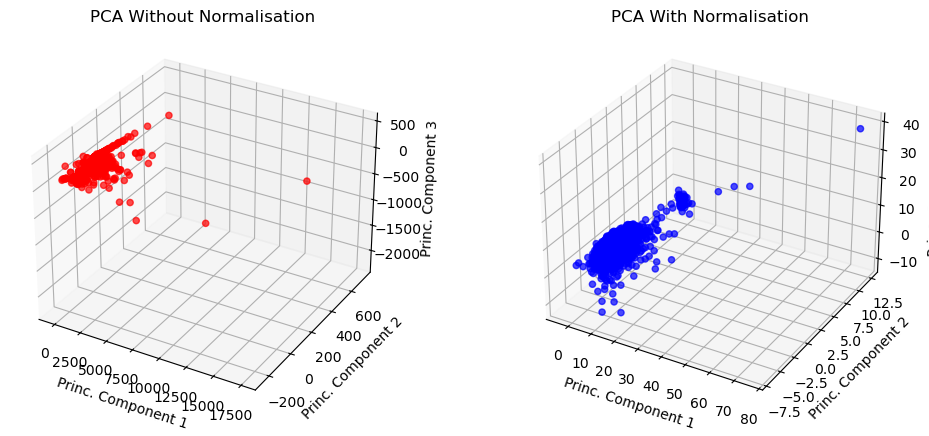

In [5]:
# Source code
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


print(X_table.shape)
# PCA Without Normalisation
pca1 = PCA(n_components=3)
X_pca = pca1.fit_transform(X_table)

# PCA With Normalisation
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_table)  # Normalise data using scaler 

pca2 = PCA(n_components=3)
X_pca_norm = pca2.fit_transform(X_norm)


# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})
ax1 = axes[0]
ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='r', alpha=0.7)
ax1.set_title("PCA Without Normalisation")

ax1.set_xlabel("Princ. Component 1")
ax1.set_ylabel("Princ. Component 2")
ax1.set_zlabel("Princ. Component 3")

ax2 = axes[1]
ax2.scatter(X_pca_norm[:, 0], X_pca_norm[:, 1], X_pca_norm[:, 2], c='b', alpha=0.7)
ax2.set_title("PCA With Normalisation")

ax2.set_xlabel("Princ. Component 1")
ax2.set_ylabel("Princ. Component 2")
ax2.set_zlabel("Princ. Component 3")

plt.show()


Comparison of Results:
- Without Normalisation, the axis of PC1 ranges from 0 to 17500 and PC3 ranges from -2000 to 500, and PC2 ranges from -200 to 600. Therefore, large scaled components with heavily affect this visualisation. This makes it very difficult to deduce visually which component is strongly affecting the data, or to see the relationship between components.
- With Normalisation, we see that the axis are reduced to PC1 0 to 80, PC2 -7.5 to 12.5 and PC3 -10 to 40. Therefore the contribution from each component is more balanced, making it much easier for us to see the relationship of the components.

How many components are needed to explain 95% of the variance?
- Here we can use sklearn functions to retreive variance info 

In [8]:
# Examine variance
# Without Normalisation

cumulative_variance_1 = np.cumsum(pca1.explained_variance_ratio_) # Using sklearn
print("Without Normalisation:")
print(cumulative_variance_1)


# With Normalisation
cumulative_variance_2 = np.cumsum(pca2.explained_variance_ratio_)
print("With Normalisation:")
print(cumulative_variance_2)




Without Normalisation:
[0.8888299  0.92803576 0.96475047]
With Normalisation:
[0.33393703 0.49051595 0.594744  ]


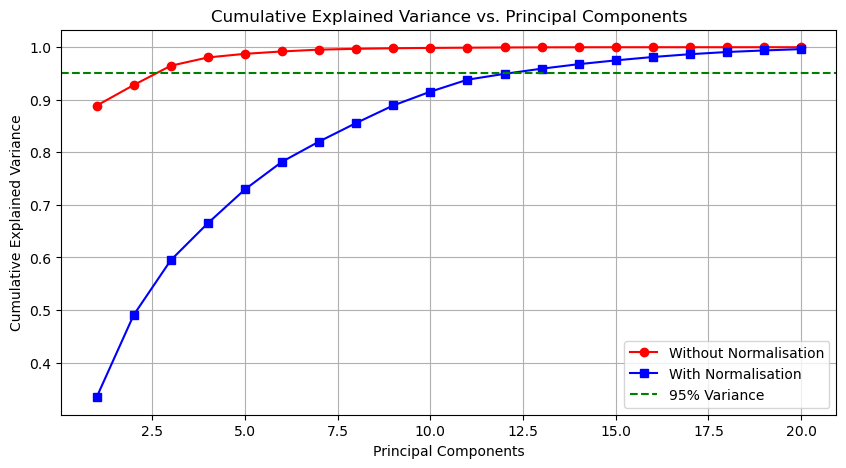

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Use PCA with more components to see how much information each contains

pca1n = PCA(n_components=20)
pca2n = PCA(n_components=20)
X_pcan = pca1n.fit_transform(X_table)
X_pca_normn = pca2n.fit_transform(X_norm)


# Sum variances across both pcas
cumulative_variance_1 = np.cumsum(pca1n.explained_variance_ratio_)
cumulative_variance_2 = np.cumsum(pca2n.explained_variance_ratio_)

# Define number of components (x-axis) to plot against variance
num_components_1 = np.arange(1, len(cumulative_variance_1) + 1)
num_components_2 = np.arange(1, len(cumulative_variance_2) + 1)

# Plot
plt.figure(figsize=(10, 5))

plt.plot(num_components_1, cumulative_variance_1, marker='o', linestyle='-', label="Without Normalisation", color='red')
plt.plot(num_components_2, cumulative_variance_2, marker='s', linestyle='-', label="With Normalisation", color='blue')

# Add line for 95% variance
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Variance')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Principal Components")
plt.legend()
plt.grid(True)
plt.show()


Without normalisation, we can see that the variance is encompassed within 3 components, which tells us that most of the information of this data is within these three components. This is because we haven't normalised any of the data, so the components with large scales will have a greater variance, and will dominate the PCA. Using the PCA without normalising gives us an idea of the scale of components in comparison to others but it is not too helpful to see the relationship pof each component with the data. 
With normalisation, we can see that the variance is explained within 12/13 components. Through normalisation, we have scaled the components appropriately so that each component influences the total variance equally. We can see the amount of information each component contains. This is more useful as we can see the effect of each component relative to eachother. 


Are there any clusters in the visualisation of PCA with normalisation? What could this be?

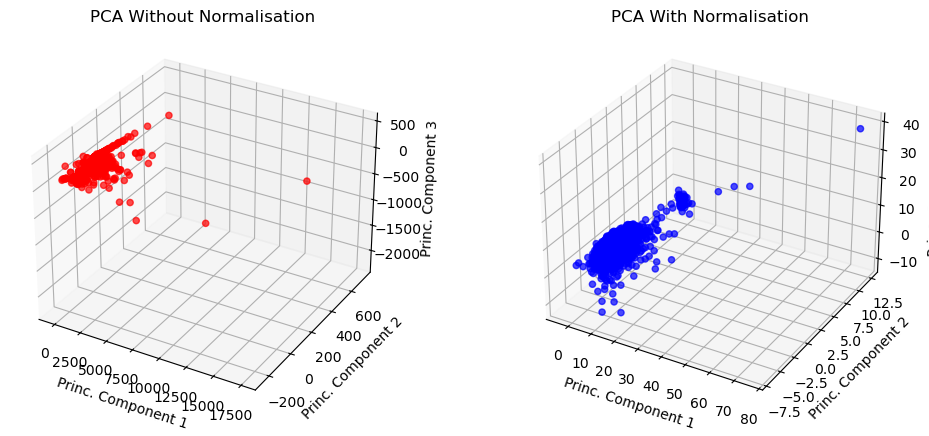

In [12]:
# Show plots again to examine clusters:

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})
ax1 = axes[0]
ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='r', alpha=0.7)
ax1.set_title("PCA Without Normalisation")

ax1.set_xlabel("Princ. Component 1")
ax1.set_ylabel("Princ. Component 2")
ax1.set_zlabel("Princ. Component 3")

ax2 = axes[1]
ax2.scatter(X_pca_norm[:, 0], X_pca_norm[:, 1], X_pca_norm[:, 2], c='b', alpha=0.7)
ax2.set_title("PCA With Normalisation")

ax2.set_xlabel("Princ. Component 1")
ax2.set_ylabel("Princ. Component 2")
ax2.set_zlabel("Princ. Component 3")

plt.show()


Here we can see that there appears to be a cluster in the normalised PCA.
\
We can investigate why this is appearing:
\
From our knowledge on galaxies, and the ReadMe file associated with our data, we may be seeing different types of galaxies (e.g. spiral or ellipitcal) as these two types will differ on different physcial properties. I would guess that this is the reason for the large left cluster and less obvious, smaller cluster on the right.
\
Another reason could be the differences in distance and redshift these galaxies have. Further galaxies will have more redshifted light, so the PCA could be picking up redshift, flux, distance differences. 

c)
\
Use use the TSNE function from sklearn.manifold to perform dimensionality reduction.

Using source code from https://scikit-learn.org/0.16/modules/generated/sklearn.manifold.TSNE.html#:~:text=t%2DSNE%20%5B1%5D%20is,and%20the%20high%2Ddimensional%20data. 


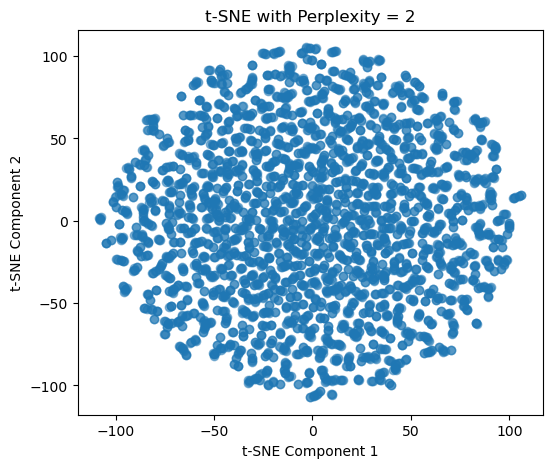

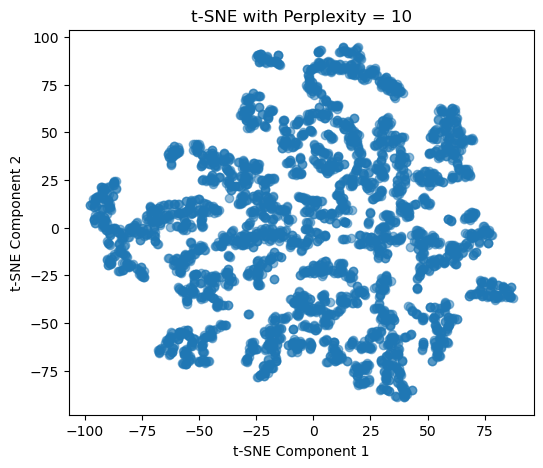

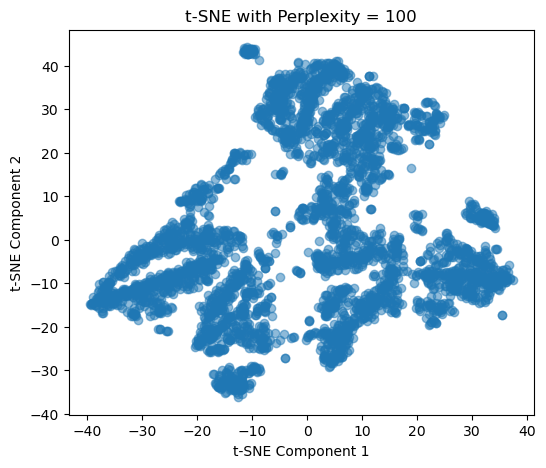

In [14]:
from sklearn.manifold import TSNE

# Define perplexities:
perplexities = [2, 10, 100]

# Use Normalised Data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_table) 

for perp in perplexities:
    model_tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne = model_tsne.fit_transform(X_norm)

    plt.figure(figsize=(6,5))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.5)
    plt.title(f"t-SNE with Perplexity = {perp}")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()

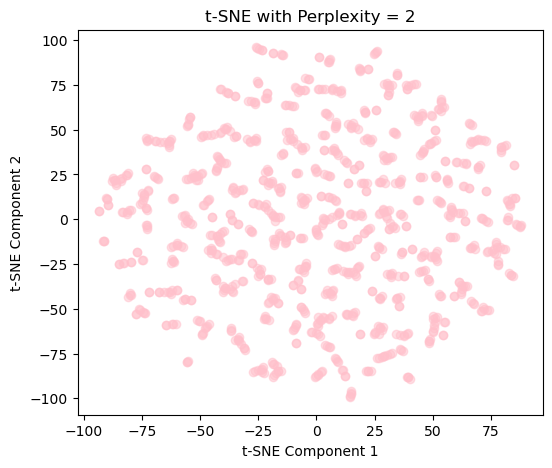

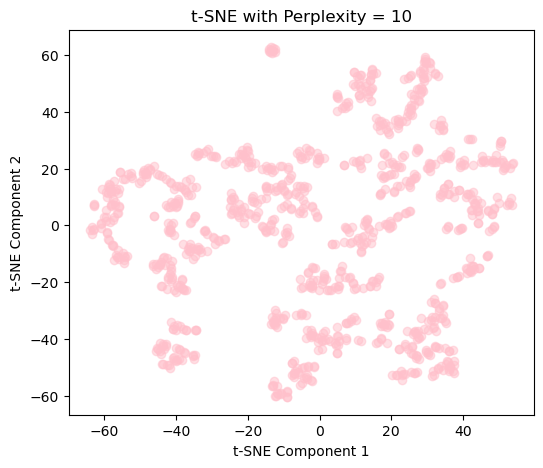

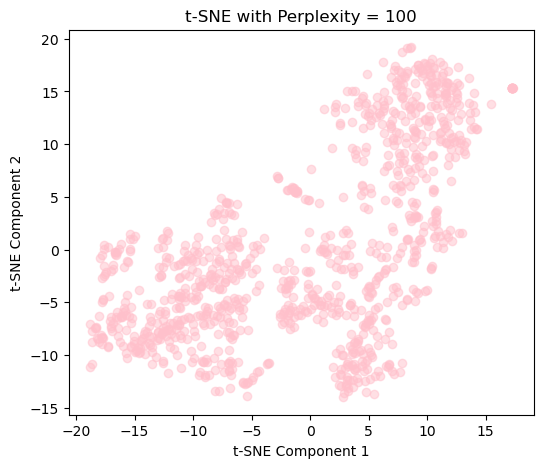

In [24]:
# Randomly sample 1,000 data points

random_indices = np.random.choice(X_norm.shape[0], 1000, replace=False)
X_subset = X_norm[random_indices]

# Try different perplexities
perplexities = [2, 10, 100]

# Run on all 3:
for perp in perplexities:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne = tsne.fit_transform(X_subset)

    # Plot
    plt.figure(figsize=(6,5))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.5, color = 'pink')
    plt.title(f"t-SNE with Perplexity = {perp}")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()


Analysis:
\
Using SNE with perplexity of 2, we see that many small clusters with a range of values. 
\
Using SNE with perplexity of 10, we see that these small clusters are now grouped into slightly larger groups and it is easier to identify clusters. There are few crossovers.
\
Using SNE with a perplexity of 100, we see a possible 3 clusters with some outliers between, there seems to be some mixing of the previosu clusters in perplexity 10. 
\
We can deduce that using a small perplexity with give us a lot of noise and it will be hard to idenitfy different spreads of galaxies. Using a perplexity of 10, we can see that clusters are easily identifiable and the data appears to be seperated into groups. Using a large perplexity of 100, it appears that the clusters now overlap and it is hard to appropriately recognise relationships or patterns. 

### Question 2: Estimating Photometric Redshifts

In [7]:
# Load Data
y_table = pd.read_pickle("./Mini Project 2/pset2-target.pkl")
x_table = pd.read_pickle('./Mini Project 2/pset2-features.pkl')
print(y_table.shape)

(3816,)


In [9]:
# Reshape to avoid 0 error when standardising
print("x_table shape:", x_table.shape)
print("y_table shape:", y_table.shape)

y_array = y_table.to_numpy() # Change to array
y_reshapedarr = y_array.reshape(-1, 1) # Reshape 
# Normalise Data
scaler = StandardScaler()
y_norm = scaler.fit_transform(y_reshapedarr)  

# Normalise data using scaler
x_array = x_table.to_numpy() # Change to array 
# Normalise Data
x_norm = scaler.fit_transform(x_array) 

# Checking dimensions:
print(x_norm.shape)
print(y_norm.shape)


x_table shape: (3816, 25)
y_table shape: (3816,)
(3816, 25)
(3816, 1)


In [11]:
# Split into test/training sets
# Using functon introduced in Mini Project 1

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.3, train_size=0.7, random_state=15, shuffle=True, stratify=None)

# print("Training set:", x_train, x_test) # Check we have assigned data
# print("Verification set:", y_train, y_test)

Creating MLP Classifier from scratch:

- Create class for linear layer:
  Initialise weights using random normal distribution. We can use numpy for this and use the input and output size as the parameters
  so this matrix is of appropriate dimensions.
  For forward propagation, we use the dot product of the two matrices input_data and self.weights (our new initialised matrix), the output
  will be a linear combination of these two matrices. This comes from properties of matrix multiplication (??).
  For backward propagation, we use gradient descent to update our new weights given our errors from our previous input/weights. For this
  we can find dot product of transposed input and output 
  
  
  

Used these YouTube videos for help:
https://www.youtube.com/watch?v=Wo5dMEP_BbI&list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3 

In [266]:
# Building from Source Code provided:

class MLPLayer:
    def __init__(self, input_size, output_size):
        #Randomly initialize the weights following a multivariate normal distribution, based on the input/output size
        
        self.weights = np.random.randn(input_size, output_size) # Don't need to transpose as matched dimensions, input data is vector?
        # Would self.weights be a 1 x output_size?
        # output_size = n neurons
        ...
        return None
        
    def forward_propagation(self, input_data):
        # Return an output that is the linear combination of the input
        # data and the tunable weights
        # Use matrix multiplication for LC:
        # Use dot product of data and weights
        self.input = input_data # Think we need to store this here 
        self.output = np.dot(input_data, self.weights) # output = weights x input data
        ...
        return self.output
        
    def backward_propagation(self, output_error, learning_rate):
        # Define the input uncertainties (or error)
        # Define the error of the weights
        # Assign a new value to the updated weights
        # Update based on grad. descent??
        
        # Transpose so dimensions work
        weights_grad = np.dot(self.input.T, output_error) # gradient of weights
        self.weights -= learning_rate * weights_grad
        # Propagated error (?) 
        input_error = np.dot(output_error, self.weights.T)
        ...
        return input_error

c) ii: Creating Nonlinear Activation Function: Sigmoid
Here we want to define our sigmoid function, find the derivative of it and an activation step. This allows us to find patterns in our data by making our model nonlinear. 
Defined sigmoid and corresponding derivative, then in initialisation process define as activation and activation derivative. 
Defined forward propagation by applying sigmoid to input and stores output.
Defined backward propagation by mulitplying by sigmoid of derivative and error. We do not use learning rate here because we do not use any weights here so we have nothing to update with learning rate. 

In [246]:

def sigmoid(x):
    # Return the sigmoid (x)
    return 1 / (1 + np.exp(-x))
    
def sigmoid_derivative(x):
    # return the derivative d(sigmoid(x))/d(x)
    return sigmoid(x) * (1 - sigmoid(x))
    
class ActivationStep:
    def __init__(self, activation = sigmoid, activation_derivative = sigmoid_derivative):
        # Define the nonlinear activation function to be used and its derivative
        self.activation = activation
        self.activation_derivative = activation_derivative
        return None
        
    def forward_propagation(self, input_data):
        # Return the input_data passed through a sigmoid
        self.input = input_data  # store for backpropagation
        self.output = self.activation(input_data)  
        return self.output
        
    def backward_propagation(self, output_error, learning_rate):
        # Define the input error
        input_error = output_error * self.activation_derivative(self.input)
        return input_error
        

iii) Define Objective Function: Mean Squared Error and Derivative

Change x to ypred to ytrue in mse function. Define each function


In [248]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.shape[0]


def mse_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / y_true.shape[0]  # Ensure it accepts both y_true and y_pred


iv) Train our network \
Using Source code provided: \
Initialise: the components as empty list to store our layers; set loss function and derivative. \
Adding layers: add components/layers to component list \
Predict: use for loop to iterate input data through our components (forward propagation) and return output as neural network output \
Fit: use epochs loop to loop through how many times we want; loop through all samples in our training data by extracting a pair of inputs and outputs; use forward propagation for our prediction and compute error; use backward propagation with error and update our weights based on this; monitor our MSE to see our progress


In [250]:
class Network:
    def __init__(self, loss = mse,
        loss_derivative=mse_derivative):
        # Define the necessary input parameters
        self.components = []
        self.loss = loss
        self.loss_derivative = loss_derivative
        return None
        
    def add_component(self, component):
        # Add linear layers or nonlinear activations
        self.components.append(component)
        return None
        
    def predict(self, input_data):
        # Full forward propoagation through each layer and activation function
        output = input_data
        for component in self.components:
            neural_network_output = component.forward_propagation(output)  # Pass data through each layer
        return neural_network_output

    def fit(self, x_train, y_train, epochs, learning_rate, x_test=None, y_test=None):
        # Gradient descent:
        for i in range(epochs):
            running_training_mse = 0
            running_test_mse = 0
            
            for j in range(num_samples):
                sample_input = x_train[j].reshape(1, -1)  # Extracting input (reshape to 1x1)
                sample_target = y_train[j].reshape(1, -1) # Extracting output
                
                # Forward Propagate the output
                output = sample_input
                for component in self.components:
                    output = component.forward_propagation(output)
                    
                # Given the output, Backpropagate backwards to compute the error
                for component in reversed(self.components):
                    error = component.backward_propagation(error, learning_rate)
                    
                # Track the average training and test MSE over each epoch
                running_training_mse += self.loss(sample_target, output)

        print(f"Epoch {i+1}/{epochs}, Training MSE: {running_training_mse / num_samples}")

        return None

v) Using a small dataset to test of MLP \
Define x^3 function and set our plot to compare later on.

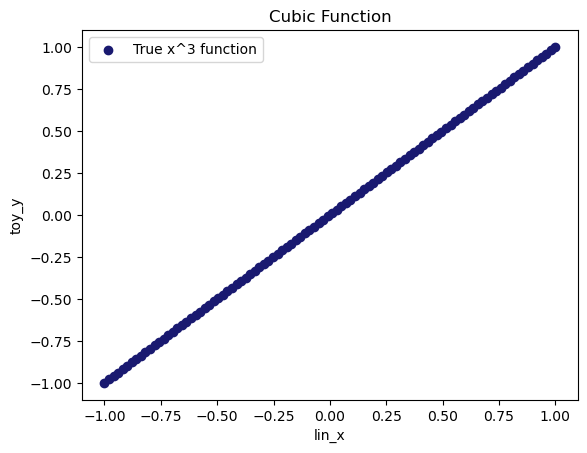

In [252]:
# Source Code:
lin_x = np.linspace(-1,1,100)
toy_X = np.vstack([lin_x, lin_x**2, lin_x**3]).T

# Generate output we want to match?
# toy_y = lin_x**3 
toy_y = lin_x 

# Plot 
plt.scatter(lin_x, toy_y, label="True x^3 function", color='midnightblue')
plt.xlabel("lin_x")
plt.ylabel("toy_y")
plt.title("Cubic Function")
plt.legend()
plt.show()

Our One Layer Model: \
Initialise random numbers using normal distribution and then apply forward propagation step (mulitply matrix). \
Define model here, which will simply be linear combination of our three inputs. This output will be our scalar. \
Compare our plot.

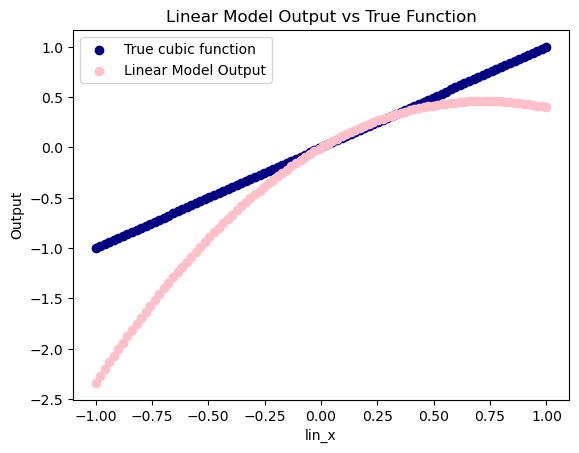

In [254]:
class SingleLayer:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size)  # Random initialisation
        
    def forwardprop(self, X):
        return X @ self.weights  # Matrix multiplication (linear transformation)

# Model:
model = SingleLayer(input_size=3, output_size=1)

# Return our scaler:
toy_y_pred = model.forwardprop(toy_X)

# Plot the results
plt.scatter(lin_x, toy_y, label="True cubic function", color='navy')
plt.scatter(lin_x, toy_y_pred, label="Linear Model Output", color='pink')
plt.xlabel("lin_x")
plt.ylabel("Output")
plt.title("Linear Model Output vs True Function")
plt.legend()
plt.show()

Single Layer Model: \
Here we see that our Single Layer model does not match our cubic function other than within lin_x = -0.2 and 0.3. This demonstrates that this single layer model is not a good predictor for our data. This is because our model is linear but our cubic function is not.  

Now let's add an activation:

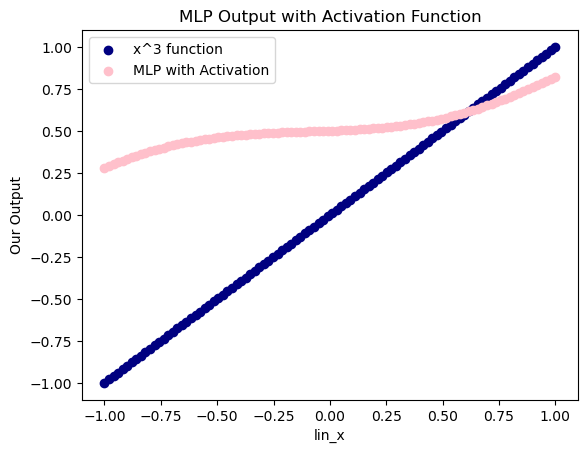

In [256]:
# Define Sigmoid Activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class SimpleMLP:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size)

    def forward(self, X):
        linear_output = X @ self.weights  
        return sigmoid(linear_output) 

# Create model with activation
mlp_model = SimpleMLP(input_size=3, output_size=1)

# Forward pass
toy_y_pred_activation = mlp_model.forward(toy_X)

# Plot the results
plt.scatter(lin_x, toy_y, label="x^3 function", color='navy')
plt.scatter(lin_x, toy_y_pred_activation, label="MLP with Activation", color='pink')
plt.xlabel("lin_x")
plt.ylabel("Our Output")
plt.title("MLP Output with Activation Function")
plt.legend()
plt.show()


Hidden Layer

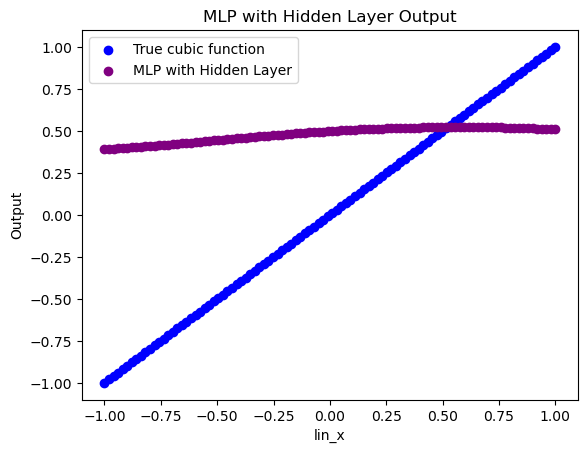

In [371]:
class MLPWithHiddenLayer:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size)  # First layer (3 to 2)
        self.weights2 = np.random.randn(hidden_size, output_size)  # Second layer (2 to 1)

    def forward(self, X):
        hidden_layer_output = sigmoid(X @ self.weights1)  # transform & activation
        output = sigmoid(hidden_layer_output @ self.weights2)  # last transform & activation
        return output

# Create model with a hidden layer
mlp_hidden = MLPWithHiddenLayer(input_size=3, hidden_size=2, output_size=1)

# Forward pass
toy_y_pred_hidden = mlp_hidden.forward(toy_X)

# Plot the results
plt.scatter(lin_x, toy_y, label="True cubic function", color='blue')
plt.scatter(lin_x, toy_y_pred_hidden, label="MLP with Hidden Layer", color='purple')
plt.xlabel("lin_x")
plt.ylabel("Output")
plt.title("MLP with Hidden Layer Output")
plt.legend()
plt.show()


Drawbacks to this: IS it a good fit? Explain below:
- This is a very poor model, and looks similar to the Single Layer model. 

vi) Next steps:
- Add at least one hidden layer
- Add sigmoid activation
- Use full data set
- Try different learning rates: 1e-1, 1e-2, 1e-3
- Train for 100 epochs
- Start by adding sigmoid
- Hidden layer
- Loop for epochs

Start by modifying Network class to be compatible with our redshift data instead of our toy data. 
- We need to take in features (x_train) and redshifts y_train, we also need to check dimensions to make our input neurons match the dimensions of x_train. \
Keep track of our training and test losses to monitor our progress. Define error at every loop and use it. 

In [260]:
# Now let's see how it is working:
input_size = x_train.shape[1]  # Number of input features
hidden_size = 10  # You can adjust this
output_size = 1  # Predicting redshift (a single scalar)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
mlp = Network()
print(input_size)

(3052, 25) (764, 25) (3052, 1) (764, 1)
25


I had many issues debugging this so called everything again below

In [360]:
# MSE Functions
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

# Sigmoid Activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Fully Connected Layer
class MLPLayer:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.input = None
        self.output = None

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        weights_grad = np.dot(self.input.T, output_error)
        
        # error for previous layer
        input_error = np.dot(output_error, self.weights.T)

        # Update weights
        self.weights -= learning_rate * weights_grad
        return input_error


class ActivationStep:
    def __init__(self, activation=sigmoid, activation_derivative=sigmoid_derivative):
        self.activation = activation
        self.activation_derivative = activation_derivative
        self.input = None
        self.output = None

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        return output_error * self.activation_derivative(self.input)

# Neural Network Class
class Network:
    def __init__(self, loss=mse, loss_derivative=mse_derivative):
        self.components = []
        self.loss = loss
        self.loss_derivative = loss_derivative

    def add_component(self, component):
        self.components.append(component)

    def predict(self, input_data):
        output = input_data
        for component in self.components:
            output = component.forward_propagation(output)
        return output

    def fit(self, x_train, y_train, epochs, learning_rate, x_test, y_test):
        num_samples = len(x_train)
        training_losses = []  # Store training losses
        test_losses = []  # Store test losses

        for epoch in range(epochs):
            total_loss = 0
            
            for i in range(num_samples):
                sample_x = x_train[i].reshape(1, -1)
                sample_y = y_train[i].reshape(1, -1)

                # Forward Pass
                output = sample_x
                for component in self.components:
                    output = component.forward_propagation(output)

                # Compute Loss
                total_loss += self.loss(sample_y, output)

                # Backpropagation
                error = self.loss_derivative(sample_y, output)
                for component in reversed(self.components):
                    error = component.backward_propagation(error, learning_rate)
            # Compute and store training loss
            avg_loss = total_loss / num_samples
            training_losses.append(avg_loss)
    
            # Store test
            if x_test is not None and y_test is not None:
                test_output = self.predict(x_test)
                test_loss = self.loss(y_test, test_output)
                test_losses.append(test_loss)

        return training_losses, test_losses 
        
# Define Hidden Layer
def buildtrainnetwork(x_train, y_train, x_test, y_test):
    input_size = x_train.shape[1]  
    hidden_size = 5  
    output_size = 1  

    mlp = Network()

    # Input with Sigmoid Activation 
    mlp.add_component(MLPLayer(input_size, hidden_size))
    mlp.add_component(ActivationStep(sigmoid, sigmoid_derivative))

    # Hidden Layer to our scalar output
    mlp.add_component(MLPLayer(hidden_size, output_size))

    # Train Model with Different Learning Rates
    for lr in [1e-1, 1e-2, 1e-3]:
        print(f"\nTraining with learning rate {lr}:")
        mlp.fit(x_train, y_train, epochs=100, learning_rate=lr, x_test=x_test, y_test=y_test)
        train_losses, test_losses = mlp.fit(x_train, y_train, epochs=100, learning_rate=lr, x_test=x_test, y_test=y_test)
    
        # Plot training and test losses
        plt.plot(range(len(train_losses)), train_losses, label="Training Loss", color='steelblue')
        if test_losses:
            plt.plot(range(len(test_losses)), test_losses, label="Test Loss", linestyle="--", color='navy')
        plt.xlabel("Epochs")
        plt.ylabel("Loss measured")
        plt.title(f"Training and Test Losses (Learning Rate = {lr})")
        plt.legend()
        plt.show()

    # Predictions
    y_pred = mlp.predict(x_test)
    return y_pred



Training with learning rate 0.1:


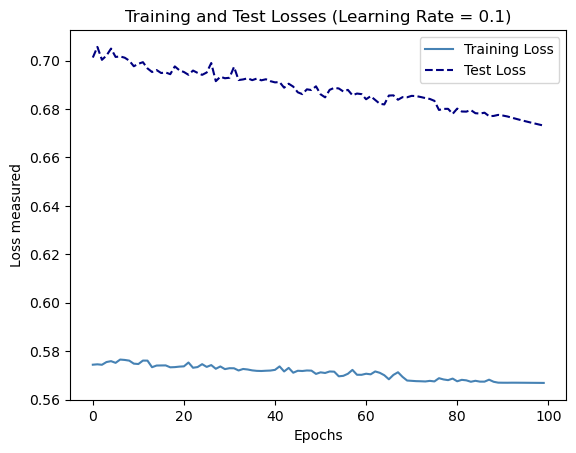


Training with learning rate 0.01:


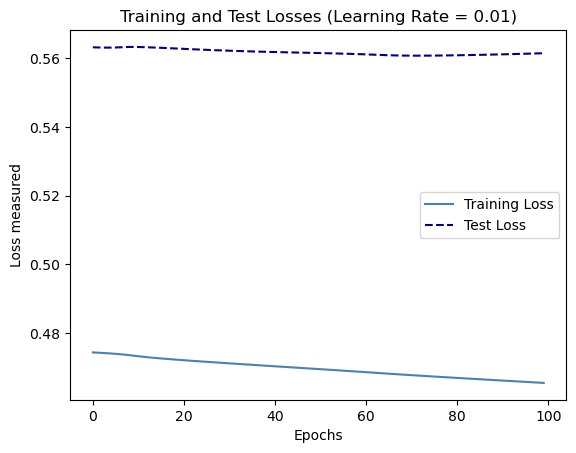


Training with learning rate 0.001:


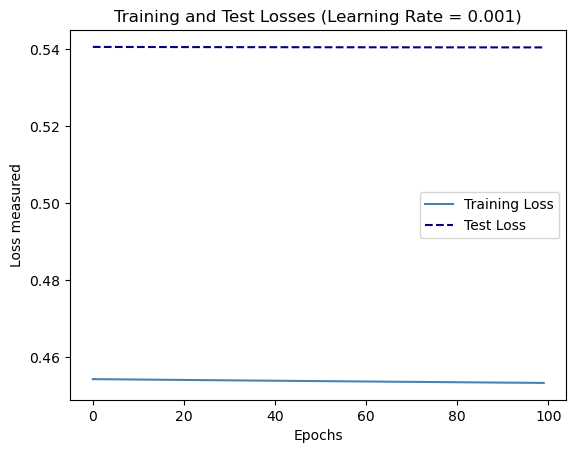

In [362]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.3, train_size=0.7, random_state=15, shuffle=True, stratify=None)
y_pred_norm = buildtrainnetwork(x_train, y_train, x_test, y_test)

In [363]:
# Inverse predictions to refer to original data
y_pred = y_scaler.inverse_transform(y_pred_norm)
y_test_original = y_scaler.inverse_transform(y_test) 

# MSE
mse = mse(y_test_original, y_pred)
print(f"Test MSE: {mse:.6f}")

Test MSE: 0.068001


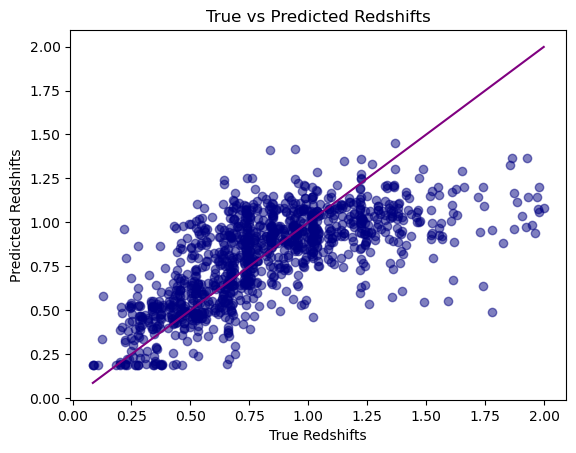

In [366]:

# Plot true vs estimated redshifts
plt.scatter(y_test_original, y_pred, alpha=0.5, color='navy')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'purple') 
plt.xlabel("True Redshifts")
plt.ylabel("Predicted Redshifts")
plt.title("True vs Predicted Redshifts")
plt.show()

Analysis:
- Overfitting?
 I think I have overfitted as with learning rates 0.01 and 0.001 the train loss continues to decrease by test lost plateaus. This shows it doesn't work as well on test.
- How does my model work?
My model seems to work poorly, I have tried to debug. I had an issue where my weights weren't updating, which I fixed but the loss measured doesn't decrease much overtime and indicates my model is not actually learning too well. Instead, it seems to plateau at the value it starts with. My training loss is much lower than test loss so this shows it does not perform well.
I was wondering whether I had normalised poorly or somehow combined the data sets.
- When we graph the true redshifts against predicted we can see that the model is not very accurate and there is a wide range of predicted redshifts that are far from the perfect prediction line (diagonal through middle).   